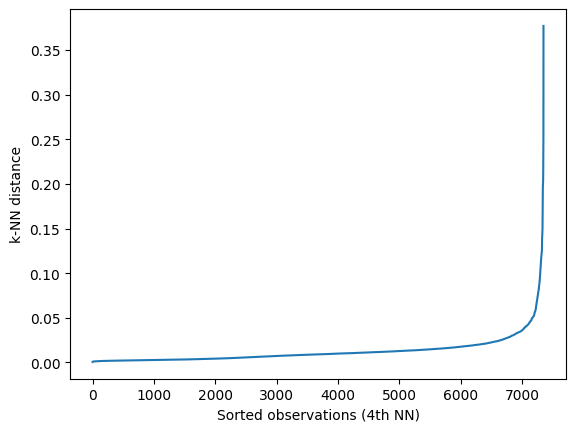

0.11816440113140045


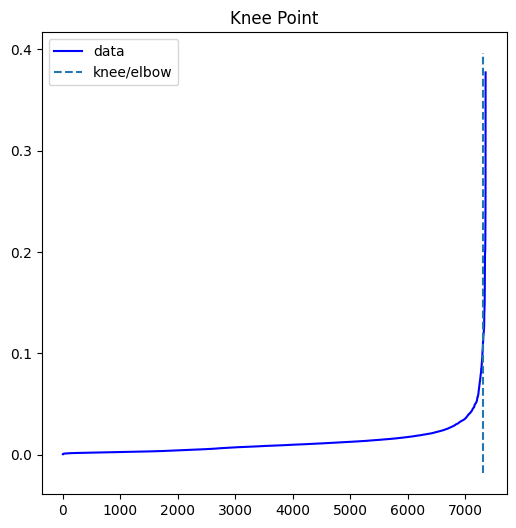

[0 0 0 ... 0 0 0]


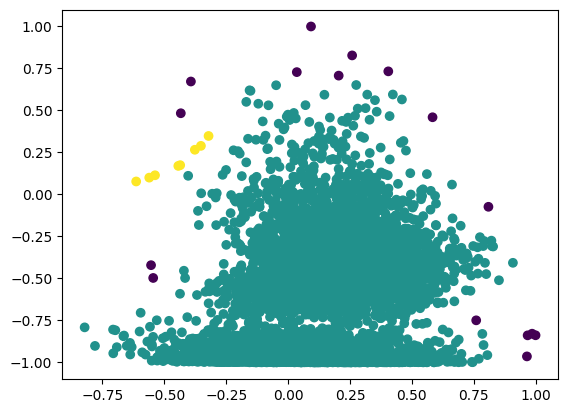

Количесвто кластеров в DBSCAN 2


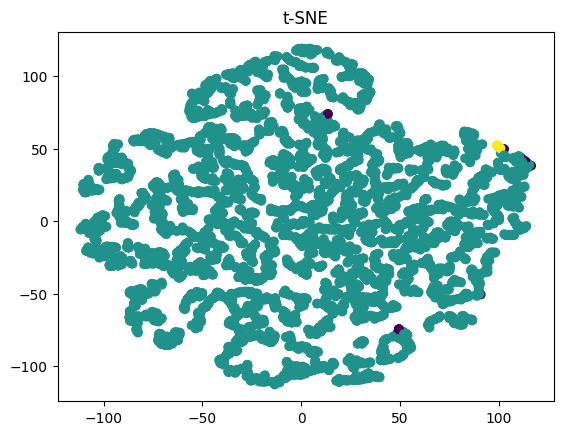

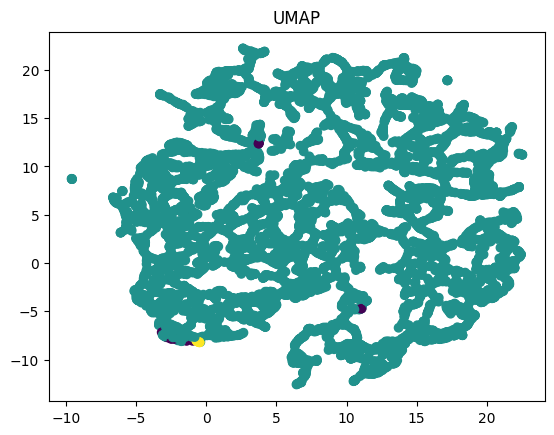

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
dataset=pd.read_csv('train.csv')
X = dataset.iloc[:, [28, 528]].values



import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors = 5).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()



dbs = DBSCAN(eps=0.11816440113140045, min_samples=5,metric='euclidean',algorithm='auto').fit(X)
print(dbs.labels_)
plt.scatter(dataset.iloc[:, 28], dataset.iloc[:, 528], c=dbs.labels_, cmap='viridis')
plt.show()
print('Количесвто кластеров в DBSCAN',len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0))


from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(X)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbs.labels_, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(X)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dbs.labels_, cmap='viridis')
plt.title('UMAP')
plt.show()